In [343]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

$\vec F$ er en vektor med grensebetingelser, med $\vec F_l = U_l$. $\vec b$ er en vektor med RHS,
$\vec b_l = h^2 h_{heat, l} $

In [344]:
#constants
a=1
r=1
T = 1/r* np.array([[r, -1], [-1, 1]]) #drit i denne
N=40
M=40
prod = (M+1)*(N+1) #gives the dimension of the matrix
siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
h_heat = np.ones(prod)*3
h_step = 1/(M+1) #equal in x and y direction

#Lager en fakkings svær matrise
matrix = np.zeros((prod, prod))
F_vec = np.zeros(prod)
b_vec = np.zeros(prod)

#Let the boundary condition be a constant initially
g = np.ones(prod)*1



for i in range(M+1): #Definerer starten og slutten på matrisen vår.
    matrix[i,i] = 1 #Matrise
    matrix[-(i+1),-(i+1)] = 1
    F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G.
    F_vec[-(i+1)] = g[-(i+1)]

for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad. Den er kongruent..
    if i % (M + 1) == 0 or i % (M + 1) == M:
        matrix[i,i] = 1
        F_vec[i] = g[i]
    else:
        matrix[i,i] = 2*a + 2
        matrix[i,i-1] = -a
        matrix[i,i+1] = -a
        matrix[i,i - M - 2] = -1
        matrix[i,i + M + 2] = -1
        b_vec[i] = h_step**2 * h_heat[i]
        

In [345]:
U = la.solve(matrix, b_vec + F_vec)
U_reshaped = np.reshape(U, (N+1, M+1))

In [346]:
#constants

def solve_Fourier(h_heat_func, g_func, a=1, r=1, N=100, M=100):
    prod = (M+1)*(N+1) #gives the dimension of the matrix
    siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
    x = np.linspace(0,1, M+1)
    y = np.linspace(0,1, N+1)
    xx, yy = np.meshgrid(x,y)
    
    h_heat = h_heat_func(xx,yy, prod) #function of two variables
    h_step = 1/M #equal in x and y direction
    
    g = g_func(xx, yy, prod) #vector of length prod.
    
    #Lager en svær matrise
    matrix = np.zeros((prod, prod))
    F_vec = np.zeros(prod)
    b_vec = np.zeros(prod)
    for i in range(M+1): #Definerer starten og slutten på matrisen vår.
        matrix[i,i] = 1 #Matrise
        matrix[-(i+1),-(i+1)] = 1
        F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G. 
        F_vec[-(i+1)] = g[-(i+1)]

    for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad.
        if i % (M + 1) == 0 or i % (M + 1) == M:
            matrix[i,i] = 1
            F_vec[i] = g[i]
        else:
            matrix[i,i] = 2*a + 2
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -1
            matrix[i,i + M + 2] = -1
            b_vec[i] = h_step**2 * h_heat[i]
    
    
    U_vector = la.solve(matrix, F_vec + b_vec)
    U_reshaped = np.reshape(U_vector, (N+1, M+1))
    
    return xx, yy, U_reshaped

In [347]:
def h_heat_func1(xx,yy, prod):
    v =  np.ones(np.shape(xx))*10
    hh = np.reshape(v, prod)
    return hh

def h_heat_func2(xx,yy, prod):
    v = (5*xx)**2 + (5*yy)**2
    hh = np.reshape(v, prod)
    return hh


def g_func1(xx, yy, prod): #returnere vektor med lengde prod
    return np.ones(prod)

def g_func2(xx, yy, prod): #returnere vektor med lengde prod
    v = np.sin(xx*2*np.pi)
    g = np.reshape(v, prod)
    return g

    
xx, yy, U1 = solve_Fourier(h_heat_func1, g_func1, N=40, M=40)
xx, yy, U2 = solve_Fourier(h_heat_func2, g_func2, N=40, M=40)


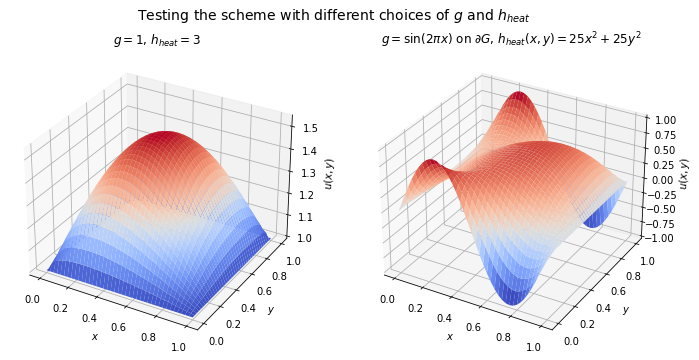

In [348]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), subplot_kw={"projection": "3d"})
ax[0].plot_surface(xx, yy, U1, cmap=cm.coolwarm)  
ax[1].plot_surface(xx, yy, U2, cmap=cm.coolwarm)  
fig.suptitle(r'Testing the scheme with different choices of $g$ and $h_{heat}$', fontsize=14)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'$g=1$, $h_{heat} = 3$')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'$g=\sin(2 \pi x)$ on $\partial G$, $h_{heat}(x,y) = 25x^2 + 25y^2$')
fig.tight_layout()

## 1 c)

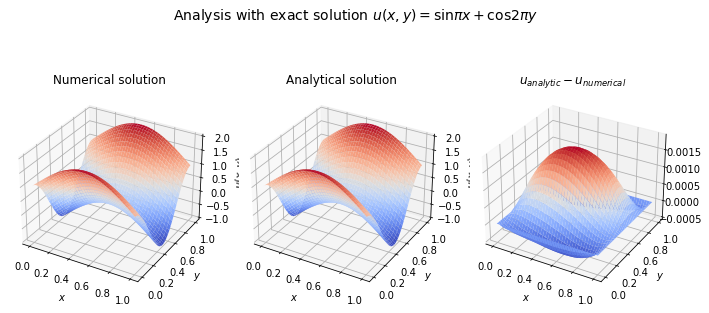

In [349]:
#New test function
def h_heat_prob1c(xx,yy, prod):
    v = (1+1) * np.pi**2* np.sin(np.pi*xx) + 4*np.pi**2*r**2 * np.cos(2*np.pi*yy) #Assuming a = 1
    hh = np.reshape(v, prod)
    return hh

def g_func_prob1c(xx, yy, prod): #returnere vektor med lengde prod
    v = np.sin(np.pi*xx) + np.cos(2*np.pi*yy)
    g = np.reshape(v, prod)
    return g

xx, yy, U_1c = solve_Fourier(h_heat_prob1c, g_func_prob1c, N=40, M=40)


#Analytical solution
U_1c_analytical = np.sin(np.pi*xx) + np.cos(2*np.pi*yy)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), subplot_kw={"projection": "3d"})
fig.suptitle(r'Analysis with exact solution $u(x,y)=\sin \pi x + \cos 2 \pi y$', fontsize=14)
ax[0].plot_surface(xx, yy, U_1c, cmap=cm.coolwarm)
ax[1].plot_surface(xx, yy, U_1c_analytical, cmap=cm.coolwarm)
ax[2].plot_surface(xx, yy, U_1c_analytical - U_1c, cmap=cm.coolwarm)  
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'Numerical solution')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'Analytical solution')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$y$')
ax[2].set_title(r'$u_{analytic} - u_{numerical}$')
fig.savefig('errorplots.pdf')
fig.tight_layout()

In [350]:
#Create an equal function, but where we can modify h instead of M, N.

def solve_Fourier_h(h_heat_func, g_func, a=1, r=1, h_step=10**(-1)):
    x = np.arange(0,1, h_step)
    y = x
    M = len(x)-1
    N = len(y)-1
    prod = (M+1)*(N+1) #gives the dimension of the matrix
    siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
    
    xx, yy = np.meshgrid(x,y)
    
    h_heat = h_heat_func(xx,yy, prod) #function of two variables
    
    g = g_func(xx, yy, prod) #vector of length prod.
    
    #Lager en svær matrise
    matrix = np.zeros((prod, prod))
    F_vec = np.zeros(prod)
    b_vec = np.zeros(prod)
    for i in range(M+1): #Definerer starten og slutten på matrisen vår.
        matrix[i,i] = 1 #Matrise
        matrix[-(i+1),-(i+1)] = 1
        F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G. 
        F_vec[-(i+1)] = g[-(i+1)]

    for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad.
        if i % (M + 1) == 0 or i % (M + 1) == M:
            matrix[i,i] = 1
            F_vec[i] = g[i]
        else:
            matrix[i,i] = 2*a + 2
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -1
            matrix[i,i + M + 2] = -1
            b_vec[i] = h_step**2 * h_heat[i]
    
    
    U_vector = la.solve(matrix, F_vec + b_vec)
    U_reshaped = np.reshape(U_vector, (N+1, M+1))
    
    return xx, yy, U_reshaped

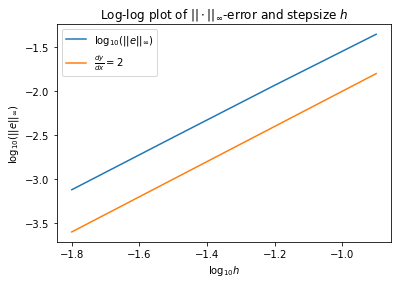

In [351]:
hs = np.logspace(-0.9, -1.8, 4)
errors = np.zeros(len(hs))
for i in range(len(hs)):
    xx, yy, U_1_test = solve_Fourier_h(h_heat_prob1c, g_func_prob1c, a=1, r=1,h_step=hs[i])
    U_1c_analytical = np.sin(np.pi*xx) + np.cos(2*np.pi*yy)
    errors[i] = np.max(np.abs(U_1c_analytical - U_1_test))

    
plt.title(r'Log-log plot of $||\cdot||_{\infty}$-error and stepsize $h$')
plt.plot(np.log10(hs), np.log10(errors) , label=r'$ \log_{10} (|| e ||_{\infty}) $')
plt.plot(np.log10(hs), 2*np.log10(hs), label=r'$\frac{dy}{dx}=2$')
plt.legend()
plt.xlabel(r'$ \log_{10} h $')
plt.ylabel(r'$ \log_{10} (|| e ||_{\infty}) $')
plt.savefig("Loglog.pdf")
plt.show()

### Problem 1d)

In [352]:
h_step = 1
r=1

print(eta)

0.0


In [391]:
#constants
def solve_Fourier_1d(h_heat_func, g_func, a=1, r=1, M=100):
    
    h_step = 1/M 
    k_step = h_step*np.abs(r)
    N = int(1/k_step) + 1
    assert(1/k_step != int(1/k_step))
    
    l = h_step*np.sqrt(1 + r**2)
    eta = (1 -  int( 1/(np.abs(r)*h_step) ) * np.abs(r)*h_step ) /( h_step* np.sqrt(1+r**2) )
    
    prod = (M+1)*(N+1) #gives the dimension of the matrix
    siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
    
    
    x = np.linspace(0,1, M+1)
    x_modified = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    y = np.arange(0,1, k_step) #length N if r is irrational
    y = np.append(y, 1) #add the last node, total of N+1
    
    xx, yy = np.meshgrid(x,y)
    xx_mod = xx.copy()
    xx_mod[-1,:] = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    
    
    h_heat = h_heat_func(xx,yy, prod) #function of two variables
    
    
    g = g_func(xx_mod, yy, prod) #vector of length prod.
    
    #Lager en svær matrise
    matrix = np.zeros((prod, prod))
    F_vec = np.zeros(prod)
    b_vec = np.zeros(prod)
    for i in range(M+1): #Definerer starten og slutten på matrisen vår.
        matrix[i,i] = 1 #Matrise
        matrix[-(i+1),-(i+1)] = 1
        F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G. 
        F_vec[-(i+1)] = g[-(i+1)]

    for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad.
        if i % (M + 1) == 0 or i % (M + 1) == M:
            matrix[i,i] = 1
            F_vec[i] = g[i]
        elif (N-1)*(M+1) + 1 <= i <= (N-1)*(M+1) + M - 1:
            matrix[i,i] = 2*a + 4/( eta*(1+r**2))
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -4/((eta + 1)*(1+r**2) )
            matrix[i,i + M + 2] = -4/(eta*(eta + 1)*(1+r**2)  )
            b_vec[i] = h_step**2 * h_heat[i]
        else:
            matrix[i,i] = 2*a + 2
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -1
            matrix[i,i + M + 2] = -1
            b_vec[i] = h_step**2 * h_heat[i]
            
    
    U_vector = la.solve(matrix, F_vec + b_vec)
    U_reshaped = np.reshape(U_vector, (N+1, M+1))
    
    g_reshaped = np.reshape(g_func(xx, yy, prod), (N+1, M+1))
    U_reshaped[-1,:] = g_reshaped[-1, :]
    
    return xx, yy, U_reshaped

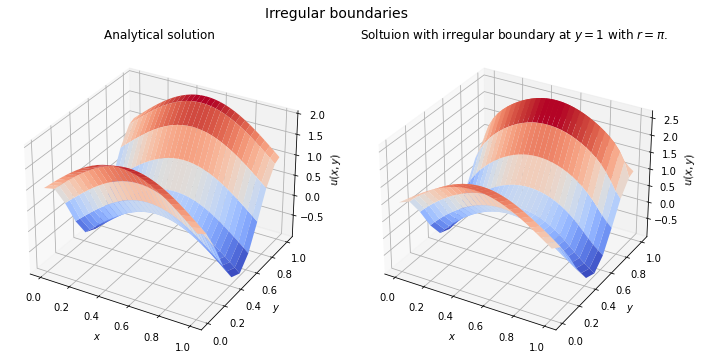

In [440]:
xx1, yy1, U_1d1 = solve_Fourier_1d(h_heat_prob1c, g_func_prob1c, a=1, r=np.pi, M=30)
#xx2, yy2, U_1d2 = solve_Fourier_1d(h_heat_prob1c, g_func_prob1c, a=1, r=np.sqrt(2), M=100)

U_1d_analytical = np.sin(np.pi*xx1) + np.cos(2*np.pi*yy1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), subplot_kw={"projection": "3d"})
ax[0].plot_surface(xx1, yy1, U_1d_analytical , cmap=cm.coolwarm)  
ax[1].plot_surface(xx1, yy1,U_1d1 , cmap=cm.coolwarm)  
fig.suptitle(r'Irregular boundaries', fontsize=14)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'Analytical solution')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'Soltuion with irregular boundary at $y=1$ with $r=\pi$.')
fig.tight_layout()

# Test zone

In [379]:
M=10
r=np.pi
h_step = 1/M #equal in x and y direction
k_step = h_step*np.abs(r) #equal in x and y direction
eta = (1 -  int( 1/(np.abs(r)*h_step) ) * np.abs(r)*h_step ) /( h_step* np.sqrt(1+r**2) )
N = int(1/k_step) + 1
print(eta)



x = np.linspace(0,1, M+1)
y = np.arange(0,1, k_step) #length N if r is irrational
y = np.append(y, 1) #add the last node, total of N+1


xx, yy = np.meshgrid(x,y)
xx[-1,:] = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
print(xx)
#print(yy)

0.1744731685674667
[[ 0.          0.1         0.2         0.3         0.4         0.5
   0.6         0.7         0.8         0.9         1.        ]
 [ 0.          0.1         0.2         0.3         0.4         0.5
   0.6         0.7         0.8         0.9         1.        ]
 [ 0.          0.1         0.2         0.3         0.4         0.5
   0.6         0.7         0.8         0.9         1.        ]
 [ 0.          0.1         0.2         0.3         0.4         0.5
   0.6         0.7         0.8         0.9         1.        ]
 [-0.08255268  0.01744732  0.11744732  0.21744732  0.31744732  0.41744732
   0.51744732  0.61744732  0.71744732  0.81744732  0.91744732]]


In [504]:
#constants
def solve_Fourier_1d_h(h_heat_func, g_func, a=1, r=1, h_step=10**(-1)):
    x = np.arange(0,1, h_step)
    M = len(x)-1
    k_step = h_step*np.abs(r) #equal in x and y direction
    N = int(1/k_step) + 1
    assert(1/k_step != int(1/k_step))
    
    l = h_step*np.sqrt(1 + r**2)
    eta = (1 -   int( 1/(np.abs(r)*h_step) )  * np.abs(r)*h_step ) /( h_step* np.sqrt(1+r**2) )
    print(eta)
    
    prod = (M+1)*(N+1) #gives the dimension of the matrix
    siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
    
    
    x = np.linspace(0,1, M+1)
    x_modified = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    y = np.arange(0,1, k_step) #length N if r is irrational
    y = np.append(y, 1) #add the last node, total of N+1
    
    xx, yy = np.meshgrid(x,y)
    xx_mod = xx.copy()
    xx_mod[-1,:] = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    
    
    h_heat = h_heat_func(xx,yy, prod) #function of two variables
    
    
    g = g_func(xx_mod, yy, prod) #vector of length prod.
    
    #Lager en svær matrise
    matrix = np.zeros((prod, prod))
    F_vec = np.zeros(prod)
    b_vec = np.zeros(prod)
    for i in range(M+1): #Definerer starten og slutten på matrisen vår.
        matrix[i,i] = 1 #Matrise
        matrix[-(i+1),-(i+1)] = 1
        F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G. 
        F_vec[-(i+1)] = g[-(i+1)]

    for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad.
        if i % (M + 1) == 0 or i % (M + 1) == M:
            matrix[i,i] = 1
            F_vec[i] = g[i]
        elif (N-1)*(M+1) + 1 <= i <= (N-1)*(M+1) + M - 1:
            matrix[i,i] = 2*a + 4/( eta*(1+r**2))
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -4/((eta + 1)*(1+r**2) )
            matrix[i,i + M + 2] = -4/(eta*(eta + 1)*(1+r**2)  )
            b_vec[i] = h_step**2 * h_heat[i]
        else:
            matrix[i,i] = 2*a + 2
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -1
            matrix[i,i + M + 2] = -1
            b_vec[i] = h_step**2 * h_heat[i]
            
    
    U_vector = la.solve(matrix, F_vec + b_vec)
    U_reshaped = np.reshape(U_vector, (N+1, M+1))
    
    g_reshaped = np.reshape(g_func(xx, yy, prod), (N+1, M+1))
    U_reshaped[-1,:] = g_reshaped[-1, :]
    
    return xx, yy, U_reshaped

0.08003904005005066
0.022982452353285998


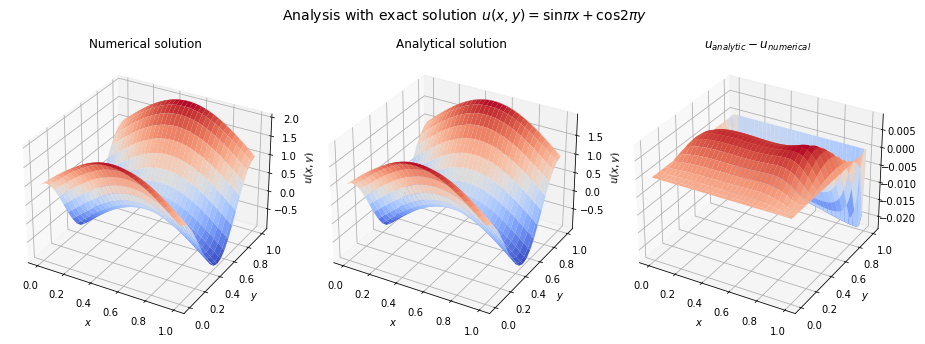

In [507]:
xx1, yy1, U_1d1 = solve_Fourier_1d_h(h_heat_prob1c, g_func_prob1c, a=1, r=np.pi, h_step=10**(-1.8))

#xx2, yy2, U_1d2 = solve_Fourier_1d(h_heat_prob1c, g_func_prob1c, a=1, r=np.sqrt(2), M=100)

U_1d_analytical = np.sin(np.pi*xx1) + np.cos(2*np.pi*yy1)

print(np.max(np.abs(U_1d_analytical - U_1d1)))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 5), subplot_kw={"projection": "3d"})
fig.suptitle(r'Analysis with exact solution $u(x,y)=\sin \pi x + \cos 2 \pi y$', fontsize=14)
ax[0].plot_surface(xx1, yy1, U_1d1, cmap=cm.coolwarm)  
ax[1].plot_surface(xx1, yy1, U_1d_analytical, cmap=cm.coolwarm)  
ax[2].plot_surface(xx1, yy1, U_1d_analytical- U_1d1, cmap=cm.coolwarm)  
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'Numerical solution')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'Analytical solution')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$y$')
ax[2].set_title(r'$u_{analytic} - u_{numerical}$')
fig.savefig('errorplots.pdf')
fig.tight_layout()



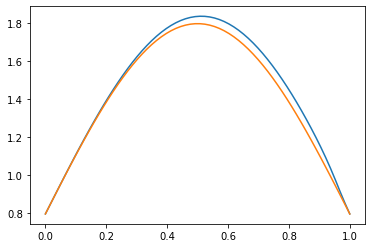

In [477]:
t=-4
plt.plot(xx1[t], U_1d1[t])
plt.plot(xx1[t], U_1d_analytical[t])
plt.show()

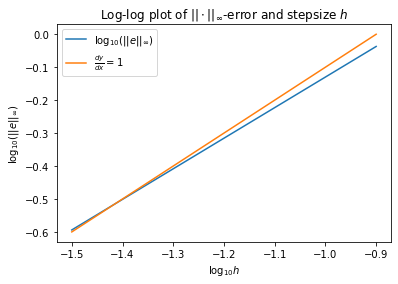

In [501]:
hs = np.logspace(-0.9, -1.5, 2)
errors = np.zeros(len(hs))
for i in range(len(hs)):
    xx, yy, U_1_test = solve_Fourier_1d_h(h_heat_prob1c, g_func_prob1c, a=1, r=np.pi, h_step=hs[i])
    U_1d_analytical = np.sin(np.pi*xx) + np.cos(2*np.pi*yy)
    errors[i] = np.max(np.abs(U_1d_analytical - U_1_test))


plt.title(r'Log-log plot of $||\cdot||_{\infty}$-error and stepsize $h$')
plt.plot(np.log10(hs), np.log10(errors) , label=r'$ \log_{10} (|| e ||_{\infty}) $')
plt.plot(np.log10(hs), np.log10(hs) + 0.9, label=r'$\frac{dy}{dx}=1$')
plt.legend()
plt.xlabel(r'$ \log_{10} h $')
plt.ylabel(r'$ \log_{10} (|| e ||_{\infty}) $')
plt.savefig("Loglog.pdf")
plt.show()

In [492]:
#IKKE FJERN!! KUK MEN FUNKER!
def solve_Fourier_1d_h_rar(h_heat_func, g_func, a=1, r=1, h_step=10**(-1)):
    x = np.arange(0,1, h_step)
    M = len(x)-1
    k_step = h_step*np.abs(r) #equal in x and y direction
    N = int(1/k_step) + 1
    assert(1/k_step != int(1/k_step))
    
    l = h_step*np.sqrt(1 + r**2)
    eta = (1 -  int( 1/(np.abs(r)*h_step) ) * np.abs(r)*h_step ) /( h_step* np.sqrt(1+r**2) )
    
    prod = (M+1)*(N+1) #gives the dimension of the matrix
    siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
    
    
    x = np.linspace(0,1, M+1)
    x_modified = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    y = np.arange(0,1, k_step) #length N if r is irrational
    y = np.append(y, 1) #add the last node, total of N+1
    
    xx, yy = np.meshgrid(x,y)
    xx_mod = xx.copy()
    xx_mod[-1,:] = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    
    
    h_heat = h_heat_func(xx,yy, prod) #function of two variables
    
    
    g = g_func(xx_mod, yy, prod) #vector of length prod.
    
    #Lager en svær matrise
    matrix = np.zeros((prod, prod))
    F_vec = np.zeros(prod)
    b_vec = np.zeros(prod)
    for i in range(M+1): #Definerer starten og slutten på matrisen vår.
        matrix[i,i] = 1 #Matrise
        matrix[-(i+1),-(i+1)] = 1
        F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G. 
        F_vec[-(i+1)] = g[-(i+1)]

    for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad.
        if i % (M + 1) == 0 or i % (M + 1) == M:
            matrix[i,i] = 1
            F_vec[i] = g[i]
        elif False: #(N-1)*(M+1) + 1 <= i <= (N-1)*(M+1) + M - 1:
            matrix[i,i] = 2*a + 4/( eta*(1+r**2))
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -4/((eta + 1)*(1+r**2) )
            matrix[i,i + M + 2] = -4/(eta*(eta + 1)*(1+r**2)  )
            b_vec[i] = h_step**2 * h_heat[i]
        else:
            matrix[i,i] = 2*a + 2
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -1
            matrix[i,i + M + 2] = -1
            b_vec[i] = h_step**2 * h_heat[i]
            
    
    U_vector = la.solve(matrix, F_vec + b_vec)
    U_reshaped = np.reshape(U_vector, (N+1, M+1))
    
    g_reshaped = np.reshape(g_func(xx, yy, prod), (N+1, M+1))
    U_reshaped[-1,:] = g_reshaped[-1, :]
    
    return xx, yy, U_reshaped

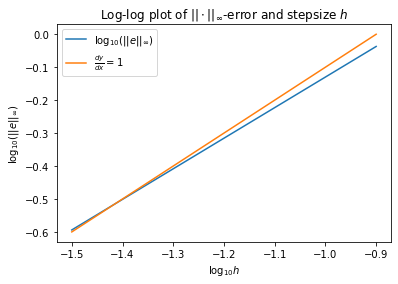

In [493]:
#TA VARE PÅ DENNE!!!!!! IKKE KJØR!
hs = np.logspace(-0.9, -1.5, 2)
errors = np.zeros(len(hs))
for i in range(len(hs)):
    xx, yy, U_1_test = solve_Fourier_1d_h_rar(h_heat_prob1c, g_func_prob1c, a=1, r=np.pi, h_step=hs[i])
    U_1d_analytical = np.sin(np.pi*xx) + np.cos(2*np.pi*yy)
    errors[i] = np.max(np.abs(U_1d_analytical - U_1_test))


plt.title(r'Log-log plot of $||\cdot||_{\infty}$-error and stepsize $h$')
plt.plot(np.log10(hs), np.log10(errors) , label=r'$ \log_{10} (|| e ||_{\infty}) $')
plt.plot(np.log10(hs), np.log10(hs) + 0.9, label=r'$\frac{dy}{dx}=1$')
plt.legend()
plt.xlabel(r'$ \log_{10} h $')
plt.ylabel(r'$ \log_{10} (|| e ||_{\infty}) $')
plt.savefig("Loglog.pdf")
plt.show()

# Problem 2

In [680]:
M_test = 8

def makeInternalgrid(M_test):
    h_step = 1/M_test
    x_list = []
    y_list = []
    eta_1_vec = np.zeros(M_test)
    for i in range(M_test):
        row =  np.arange(0, np.sqrt(1- (i*h_step)**2 ), h_step)
        col = np.ones(len(row))*(i*h_step) #corresponding y_vals
        x_list.append(row)
        y_list.append(col)
        
        eta_1_vec[i] = (np.sqrt(1- (i*h_step)**2 ) - row[-1])/h_step
    return x_list, y_list, eta_1_vec

    
#Lage 2D liste med alle grensepunkter, første indeks x, andre indeks y
def makeBoundary(M_test):
    h_step = 1/M_test
    x_curve1 = np.arange(0,1 + h_step ,h_step)
    y_curve1 = np.sqrt(1 - x_curve1**2)
    y_curve2 = np.arange(h_step,1 ,h_step)
    x_curve2 = np.sqrt(1 - y_curve2**2)
    x_curve1 = np.append(x_curve1, x_curve2 )
    y_curve1 = np.append(y_curve1, y_curve2 )
    
    points = np.array([x_curve1, y_curve1])
    points = list(points.transpose())
    points = list(set(tuple(element) for element in points) )
    points.sort(key = lambda e: e[0], reverse=True )
    points = np.array(points)
    
    
    return points

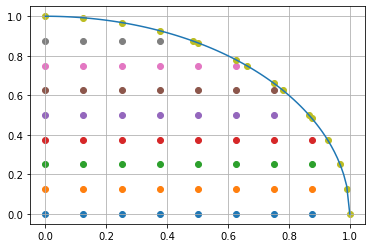

In [685]:
x_list, y_list, eta_1_vec = makeInternalgrid(M_test) #Øker i høyden med rader!

lengths = [len(i) for i in x_list ]
indx_row = np.zeros(len(lengths), dtype=int) #gives index of first element in given row from the bottom
for i in range(len(lengths)-1):
    indx_row[i+1] = indx_row[i] + lengths[i]


for i in range(len(x_list)):
    plt.scatter( x_list[i], y_list[i] )

x_curve = np.linspace(0,1,100)
plt.plot(x_curve, np.sqrt(1 - x_curve**2) )


bndry_points = makeBoundary(M_test)

plt.scatter(bndry_points[:,0], bndry_points[:, 1])
plt.grid()
plt.show()

In [691]:
def num_Ups(x_list): #returnerer en vektor der indeks angir rad, og tall er antall fra høyre med UpSchemes.
    num_Ups = np.zeros(len(x_list), dtype=int)
    for row_idx in range(len(x_list)):      
        lengths = [len(i) for i in x_list ]
        if row_idx == len(x_list)-1:
             num_Ups[row_idx] = lengths[row_idx]
        else:
            num_Ups[row_idx] = lengths[row_idx] - lengths[row_idx+1]
    
    return num_Ups
print(num_Ups(x_list))
#find indexes who need UP Scheme        

[0 0 0 1 0 1 2 4]
